In [4]:
import json
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
import missingno

# Load data

In [6]:
passengers = pd.read_csv('../ready_dataframes/passengers.csv', index_col=0)

In [7]:
passengers

Name  Registered  TotalFlights  CountriesVisited  \
0           adel afanasev           0             3                 2   
1              adel ageev           1            47                13   
2             adel akimov           1            39                 7   
3            adel aksenov           0            17                 5   
4        adel aleksandrov           0            21                10   
...                   ...         ...           ...               ...   
74472        zlata zotova           0            66                13   
74473        zlata zubova           0            43                17   
74474       zlata zvereva           1            14                 4   
74475  zlata zvyagintseva           1            24                 3   
74476        zlata zykova           0            27                 5   

       TotalBonusPrograms  UseSU  UseDT  UseKE  UseFB  Gender  ...  MeanDelta  \
0                       0      0      0      0      0       1  ...  90.500000   
1                       5      1      1      1      1       1  ...   7.282609   
2                       4      1      1      1      1       1  ...   9.421053   
3                       2      0      1      1      0       1  ...  21.312500   
4                       0      0      0      0      0       1  ...  18.100000   
...                   ...    ...    ...    ...    ...     ...  ...        ...   
74472                   3      0      1      1      1       0  ...   5.476923   
74473                   2      0      1      1      0       0  ...   8.500000   
74474                   3      1      1      0      1       0  ...  19.384615   
74475                   1      1      0      0      0       0  ...  14.782609   
74476                   1      0      0      0      1       0  ...  12.884615   

       PercentToRussia  PercentToUSA  PercentToChina  NumberAirlines  \
0             0.333333      0.000000        0.666667               2   
1             0.085106      0.510638        0.063830               7   
2             0.153846      0.230769        0.333333               8   
3             0.411765      0.000000        0.000000               3   
4             0.285714      0.000000        0.000000               5   
...                ...           ...             ...             ...   
74472         0.045455      0.712121        0.015152              10   
74473         0.209302      0.069767        0.069767              12   
74474         0.071429      0.642857        0.000000               3   
74475         0.291667      0.000000        0.666667               4   
74476         0.037037      0.555556        0.333333               5   

       NumberAirlinesPerFlight  HideRealName  UniqueCountriesPerFlight  \
0                     0.666667             0                  0.666667   
1                     0.148936             0                  0.276596   
2                     0.205128             1                  0.179487   
3                     0.176471             0                  0.294118   
4                     0.238095             0                  0.476190   
...                        ...           ...                       ...   
74472                 0.151515             0                  0.196970   
74473                 0.279070             0                  0.395349   
74474                 0.214286             1                  0.285714   
74475                 0.166667             0                  0.125000   
74476                 0.185185             0                  0.185185   

       NumberFlightsAbroad  PercentFlightsAbroad  
0                        0              0.000000  
1                        2              0.042553  
2                        3              0.076923  
3                        3              0.176471  
4                        2              0.095238  
...                    ...                   ...  
74472                    3              0.045455  
74473    

# Data cleaning

<AxesSubplot:>

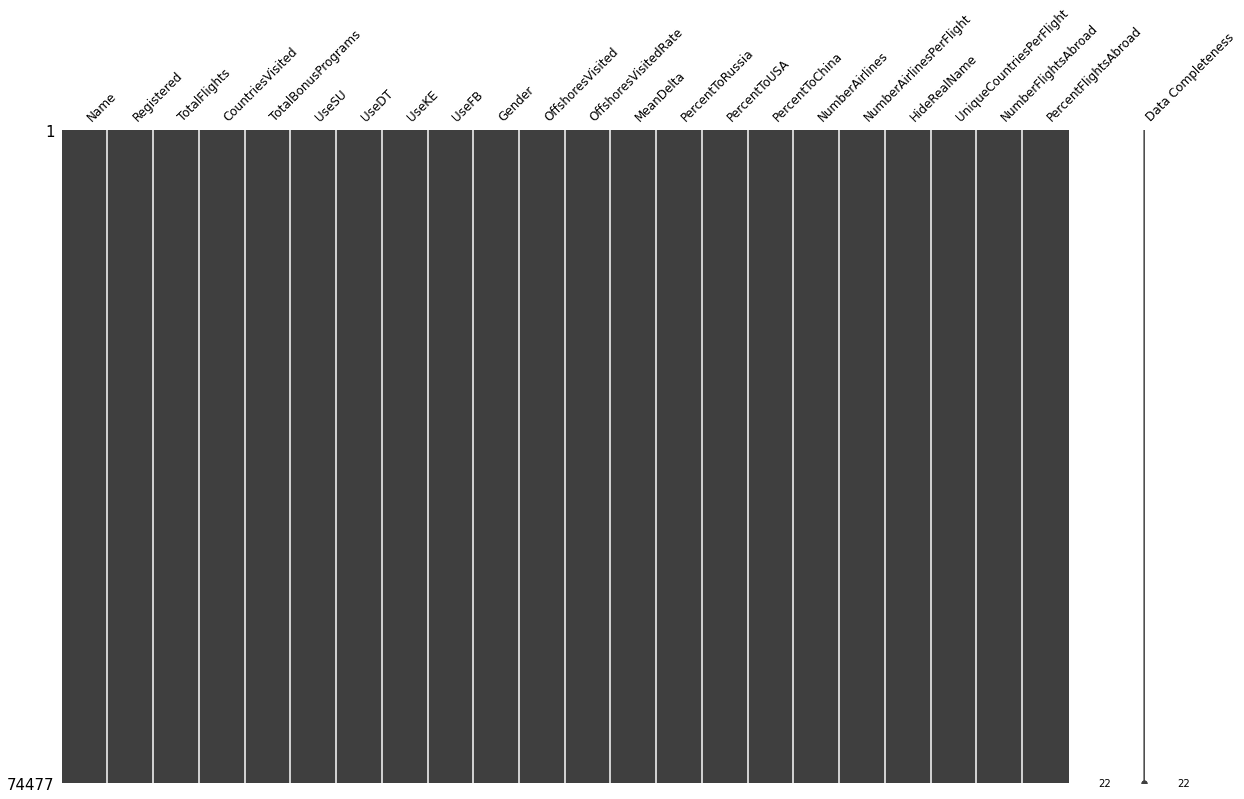

In [8]:
missingno.matrix(passengers, labels=True, figsize=(20, 12), fontsize=12)

# Fit model

## Isolation Forest

In [45]:
model = IsolationForest(contamination=0.001, max_features=0.5)

In [46]:
y_pred = model.fit_predict(passengers.drop(['Name', 'OffshoresVisitedRate', 'PercentFlightsAbroad',
                                           'UseDT', 'UseKE', 'UseFB', 'Gender', 'NumberAirlinesPerFlight',
                                           'UniqueCountriesPerFlight',],
                                           axis=1))

## One-Class SVM

In [161]:
passengers_norm = passengers.drop(['Name', 'OffshoresVisited'], axis=1)

In [162]:
cols_to_log = ['TotalFlights', 'CountriesVisited', 'TotalBonusPrograms', 'MeanDelta', 'PercentToRussia', 
              'PercentToUSA', 'PercentToChina', 'NumberAirlines', 'NumberFlightsAbroad']

In [163]:
for col in cols_to_log:
    passengers_norm[col] = passengers_norm[col].map(lambda x: np.log(x + 1))

In [177]:
scaler = StandardScaler()

In [178]:
passengers_norm[cols_to_log] = scaler.fit_transform(passengers_norm[cols_to_log])

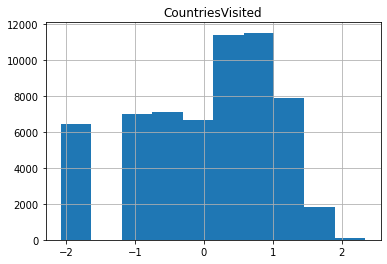

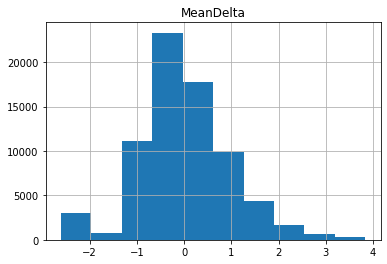

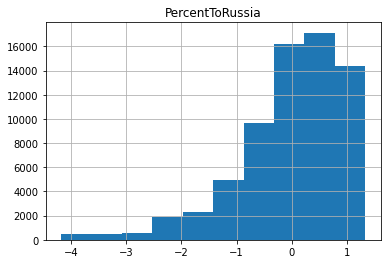

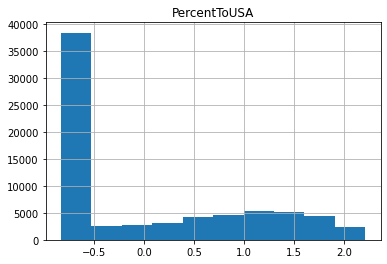

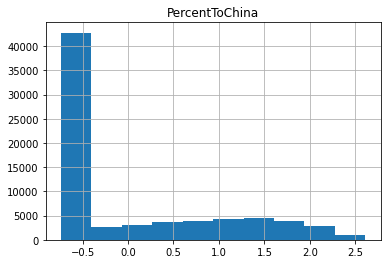

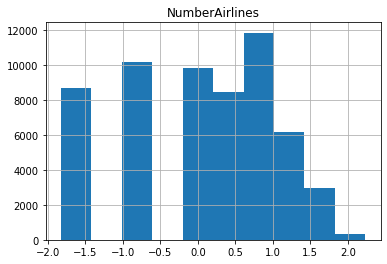

In [157]:
for col in cols_to_log:
    passengers_norm[col].hist()
    plt.title(col)
    plt.show()

In [135]:
cols_to_scale = ['TotalFlights', 'CountriesVisited', 'TotalBonusPrograms', 'MeanDelta', 
                 'NumberAirlines', 'NumberFlightsAbroad']

In [158]:
model = OneClassSVM()

In [179]:
passengers_norm

Registered  TotalFlights  CountriesVisited  TotalBonusPrograms  UseSU  \
0               0     -1.610742         -1.255910           -1.312728      0   
1               1      1.364252          1.274652            1.899882      1   
2               1      1.115660          0.355345            1.572981      1   
3               0      0.189978         -0.117244            0.657075      0   
4               0      0.430226          0.878483           -1.312728      0   
...           ...           ...               ...                 ...    ...   
72886           0      1.763516          1.274652            1.172887      0   
72887           0      1.260079          1.687498            0.657075      0   
72888           1     -0.028302         -0.416753            1.172887      1   
72889           1      0.534398         -0.783321           -0.069921      1   
72890           0      0.718951         -0.117244           -0.069921      0   

       UseDT  UseKE  UseFB  Gender  MeanDelta  PercentToRussia  PercentToUSA  \
0          0      0      0       1   1.719176         0.104733     -0.726658   
1          1      1      1       1  -0.934081        -0.929884      1.567423   
2          1      1      1       1  -0.653743        -0.719269      0.455391   
3          1      1      0       1   0.160486         0.391801     -0.726658   
4          0      0      0       1  -0.011221        -0.077917     -0.726658   
...      ...    ...    ...     ...        ...              ...           ...   
72886      1      1      1       0  -1.205696        -1.116846      2.263661   
72887      1      1      0       0  -0.782614        -0.385638     -0.351619   
72888      1      0      1       0   0.060675        -0.993593      2.034014   
72889      0      0      0       0  -0.175890        -0.175916     -0.726658   
72890      0      0      1       0  -0.363460        -1.157447      1.730362   

       PercentToChina  NumberAirlines  HideRealName  UniqueCountriesPerFlight  \
0            2.591610       -1.144415             0                  0.666667   
1           -0.252084        0.760083             0                  0.276596   
2            1.219732        0.988785             1                  0.184211   
3           -0.644009       -0.585816             0                  0.294118   
4           -0.644009        0.201484             0                  0.476190   
...               ...             ...           ...                       ...   
72886       -0.548758        1.378432             0                  0.196970   
72887       -0.216830        1.702804             0                  0.395349   
72888       -0.644009       -0.585816             1                  0.285714   
72889        2.700822       -0.152533             0                  0.130435   
72890        1.178197        0.201484             0                  0.185185   

       NumberFlightsAbroad  PercentFlightsAbroad  OffshoresVisitedRate  \
0                -1.334402              0.000000              0.000000   
1                 0.610249              0.042553              0.076923   
2                 1.119475              0.078947              0.000000   
3                 1.119475              0.176471              0.000000   
4                 0.610249              0.095238              0.000000   
...                    ...                   ...                   ...   
72886             1.119475              0.045455              0.000000   
72887             1.837188              0.116279              0.058824   
72888            -0.107464              0.071429              0.000000   
72889            -0.107464              0.043478              0.000000   
72890            -0.107464              0.037037              0.000000   

       NumberAirlinesPerFlight  
0                     0.666667  
1                     0.148936  
2                     0.210526  
3                     0.176471  
4                     0.238095  
...                      

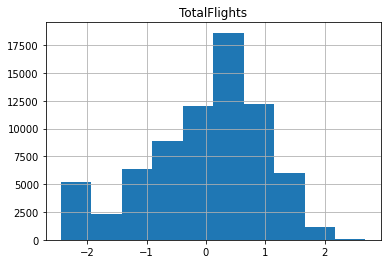

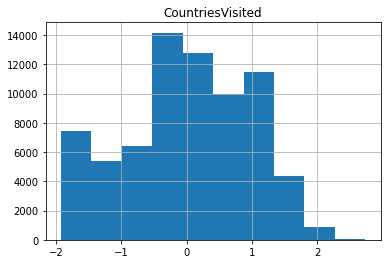

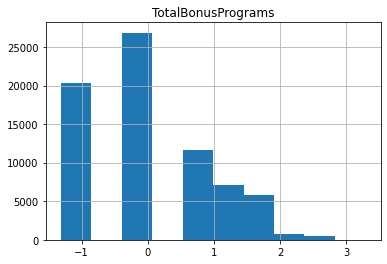

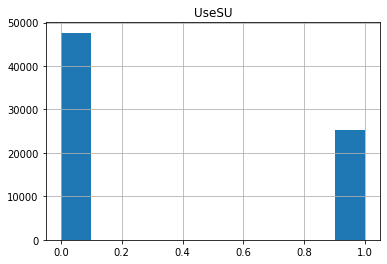

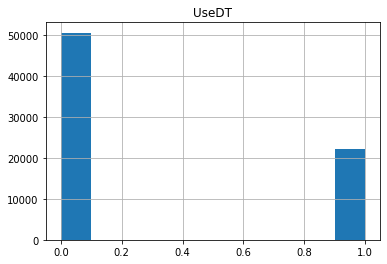

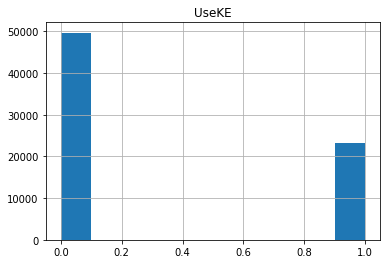

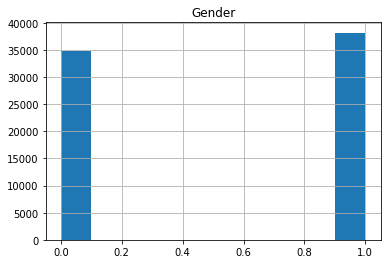

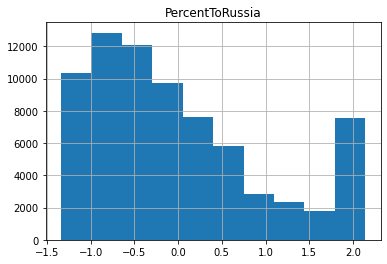

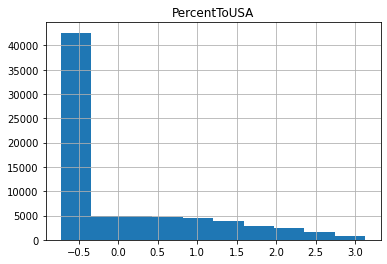

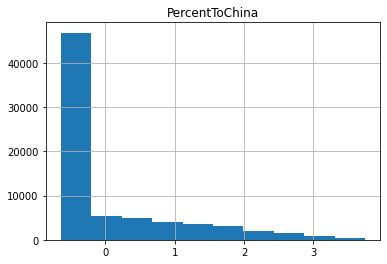

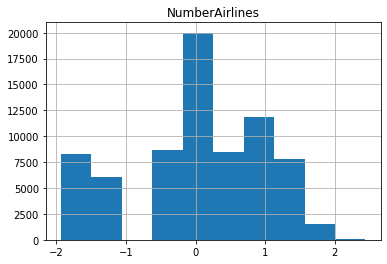

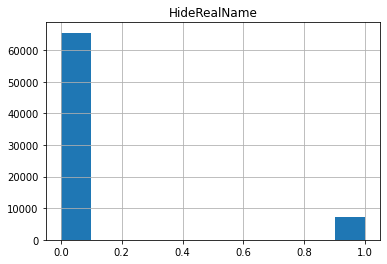

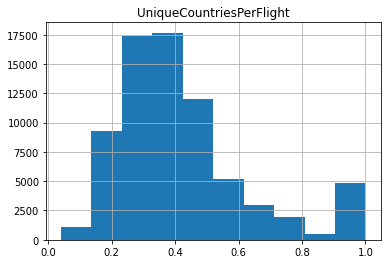

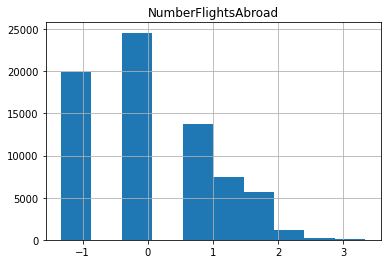

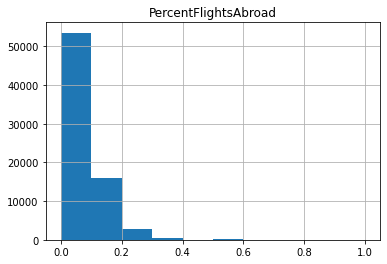

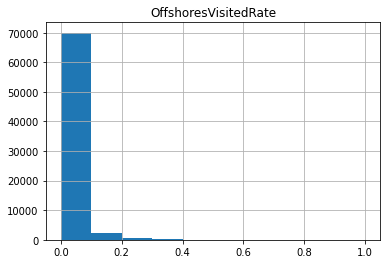

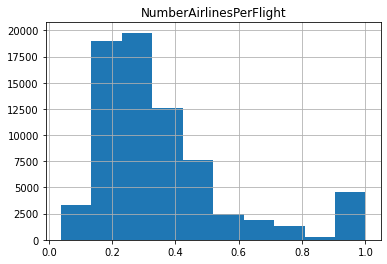

In [181]:
for col in passengers_norm.columns:
    passengers_norm[col].hist()
    plt.title(col)
    plt.show()

In [188]:
y_pred = model.fit_predict(passengers_norm[['TotalFlights', 'CountriesVisited', 'MeanDelta', 'NumberAirlines']])

## EllipticEnvelope

In [251]:
model = EllipticEnvelope(contamination=0.01)

In [238]:
cols_for_elliptic = ['TotalFlights', 'CountriesVisited', 'MeanDelta']

In [252]:
y_pred = model.fit_predict(passengers_norm)

# Predict

In [47]:
bad_passengers = passengers[y_pred == -1]

In [48]:
good_passengers = passengers[y_pred == 1]

In [49]:
bad_passengers

Name  Registered  TotalFlights  CountriesVisited  \
1934       albina bazhenova           1            85                21   
2715     aleksandra klimova           1            97                30   
4582        alisa kirillova           1            70                22   
4918         aliya korneeva           1            81                24   
4983       aliya nikiforova           1            87                20   
...                     ...         ...           ...               ...   
68865   vladislava artemova           1           107                32   
68893  vladislava dobrynina           1            78                26   
69659    vyacheslav krasnov           1            73                22   
73723      zakhar shestakov           1            89                21   
74022    zarina petrovskaya           1            83                22   

       TotalBonusPrograms  UseSU  UseDT  UseKE  UseFB  Gender  ...  MeanDelta  \
1934                   10      1      1      1      1       0  ...   4.321429   
2715                    4      1      1      1      0       0  ...   3.802083   
4582                    8      1      1      1      1       0  ...   5.217391   
4918                    8      1      1      1      1       0  ...   4.525000   
4983                    8      1      1      1      0       0  ...   4.197674   
...                   ...    ...    ...    ...    ...     ...  ...        ...   
68865                   5      1      1      1      1       0  ...   3.367925   
68893                   6      1      1      1      1       0  ...   4.701299   
69659                   7      1      1      1      1       1  ...   4.847222   
73723                   9      1      1      1      1       1  ...   4.147727   
74022                   3      1      1      1      0       0  ...   4.243902   

       PercentToRussia  PercentToUSA  PercentToChina  NumberAirlines  \
1934          0.258824      0.117647        0.094118              13   
2715          0.247423      0.061856        0.144330              14   
4582          0.242857      0.142857        0.185714              11   
4918          0.345679      0.111111        0.049383              15   
4983          0.356322      0.126437        0.206897              15   
...                ...           ...             ...             ...   
68865         0.074766      0.037383        0.074766              15   
68893         0.410256      0.038462        0.115385              16   
69659         0.219178      0.068493        0.082192              16   
73723         0.213483      0.280899        0.044944              12   
74022         0.325301      0.024096        0.144578              15   

       NumberAirlinesPerFlight  HideRealName  UniqueCountriesPerFlight  \
1934                  0.152941             1                  0.247059   
2715                  0.144330             1                  0.309278   
4582                  0.157143             1                  0.314286   
4918                  0.185185             1                  0.296296   
4983                  0.172414             1                  0.229885   
...                        ...           ...                       ...   
68865                 0.140187             1                  0.299065   
68893                 0.205128             0                  0.333333   
69659                 0.219178             1                  0.301370   
73723                 0.134831             1                  0.235955   
74022                 0.180723             0                  0.265060   

       NumberFlightsAbroad  PercentFlightsAbroad  
1934                     8              0.094118  
2715                     9              0.092784  
4582                     7              0.100000  
4918                    10              0.123457  
4983                    10              0.114943  
...                    ...                   ...  
68865                    7            

In [74]:
def plot_pairplot(cols):
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            fig, ax = plt.subplots(figsize=(8, 5))
            sns.scatterplot(good_passengers[cols[i]], good_passengers[cols[j]])
            sns.scatterplot(bad_passengers[cols[i]], bad_passengers[cols[j]])
            plt.legend(labels=['Good passengers', 'Bad passengers'])
            plt.show()

In [84]:
def plot_hists():
    cols = passengers.columns
    for i in range(1, len(cols)):
        #fig, ax = plt.subplots(figsize=(6, 4))
        sns.histplot(good_passengers[cols[i]])
        plt.title('Good passengers')
        plt.show()
        #fig, ax = plt.subplots(figsize=(6, 4))
        sns.histplot(bad_passengers[cols[i]])
        plt.title('Bad passengers')
        plt.show()

In [76]:
cols = ['TotalFlights', 'CountriesVisited',
       'TotalBonusPrograms',
       'OffshoresVisited', 'MeanDelta', 'PercentToRussia', 'PercentToUSA',
       'PercentToChina', 'NumberAirlines', 'HideRealName',
       'UniqueCountriesPerFlight', 'NumberFlightsAbroad',
       'PercentFlightsAbroad',
       'OffshoresVisitedRate', 'NumberAirlinesPerFlight']

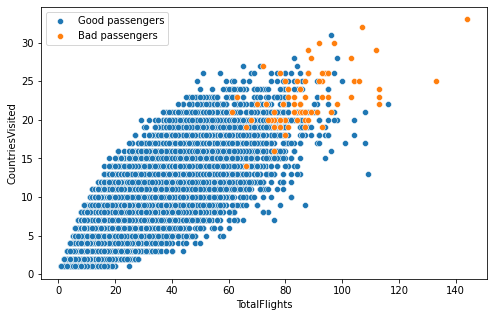

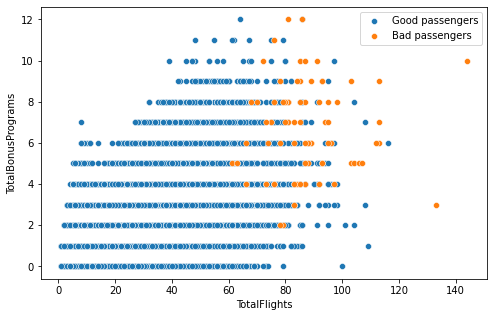

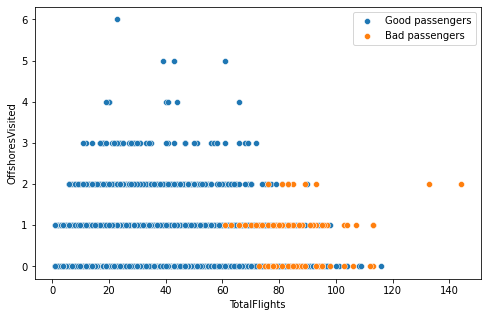

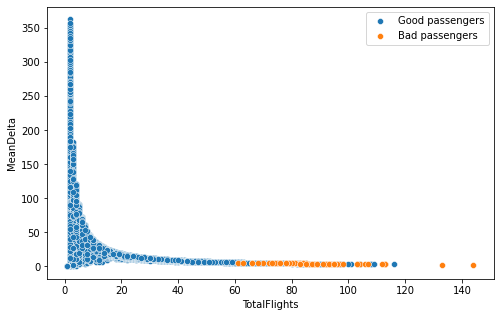

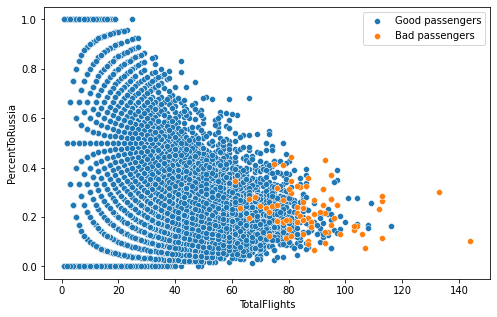

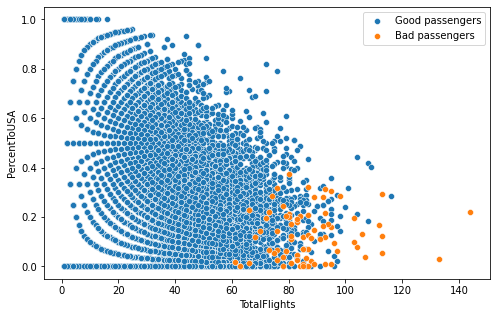

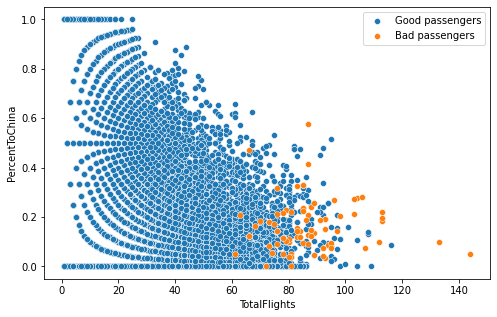

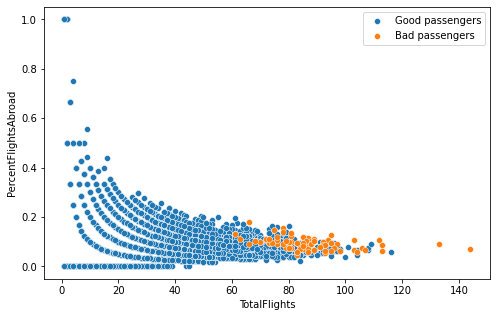

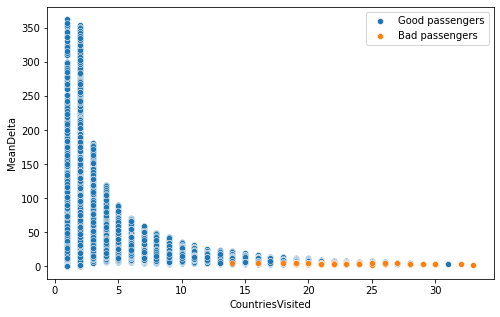

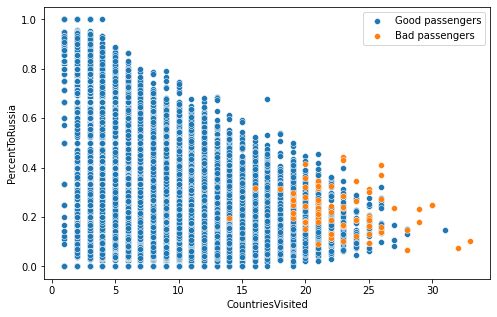

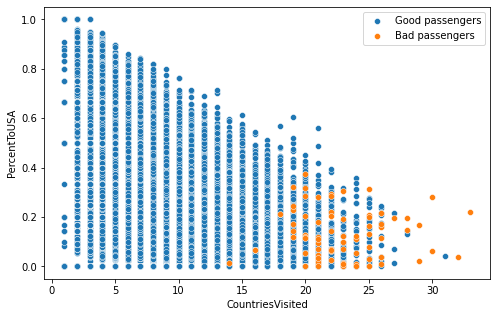

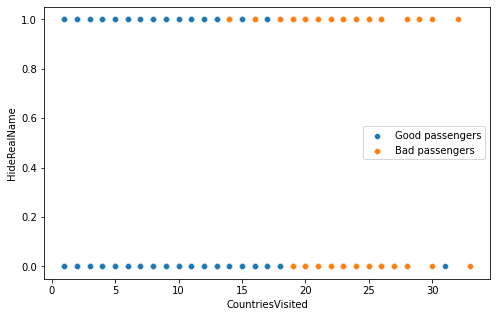

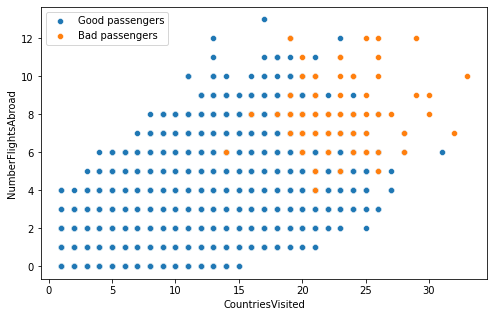

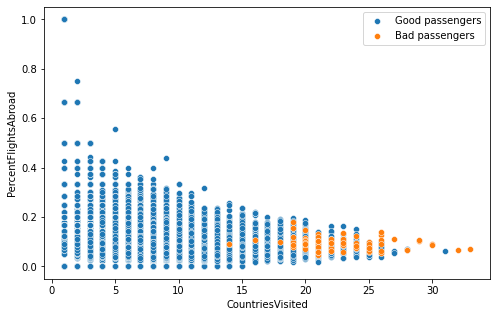

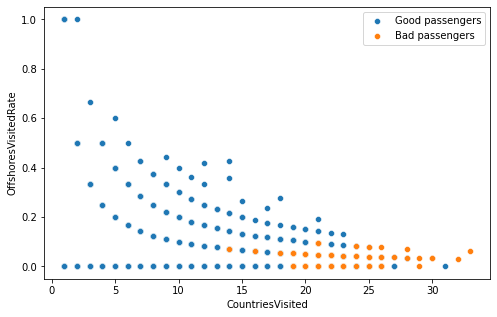

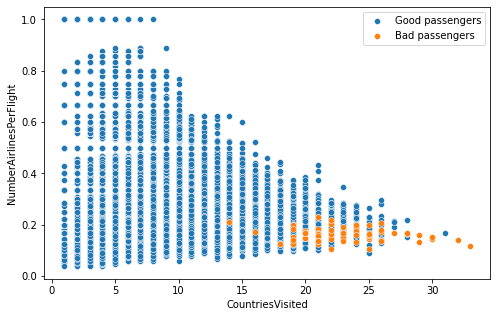

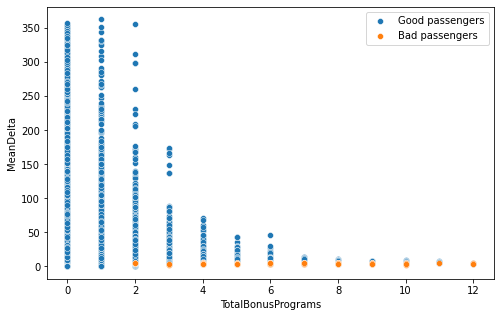

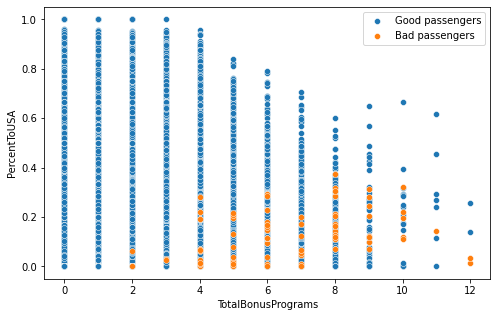

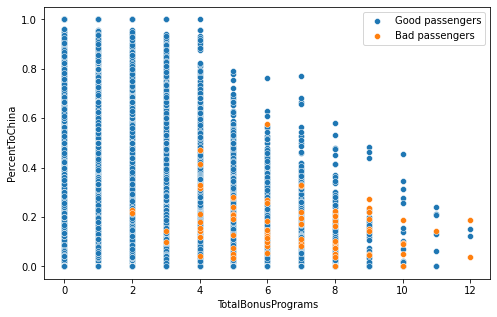

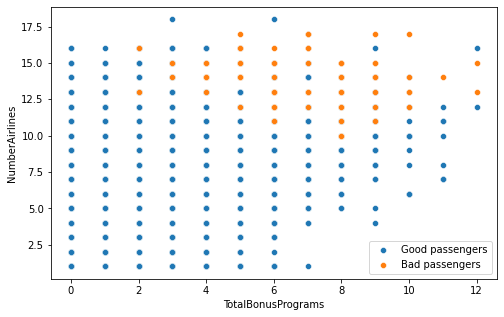

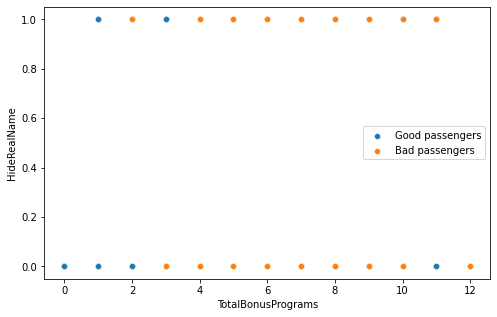

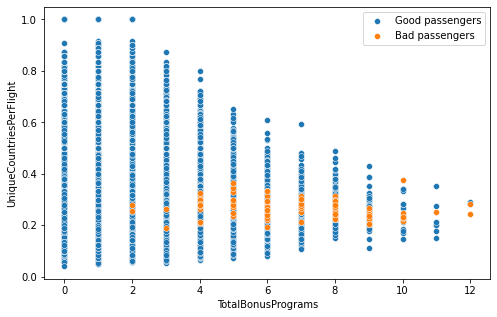

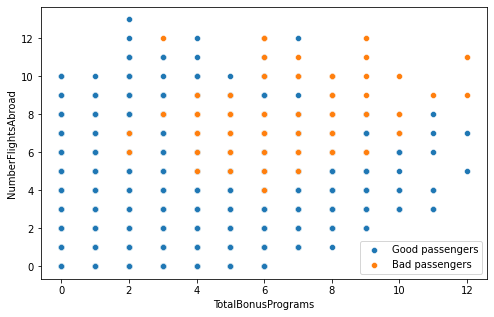

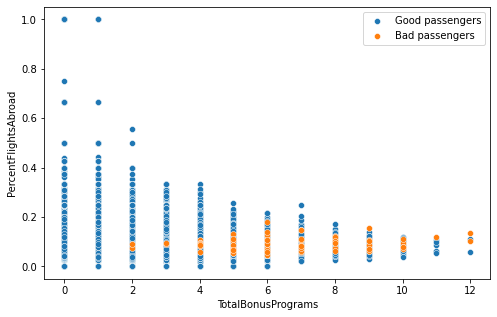

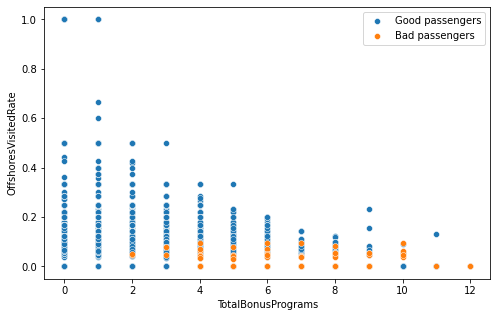

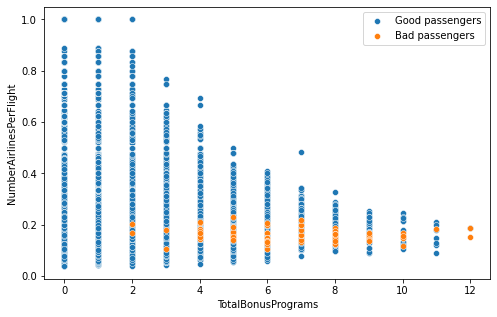

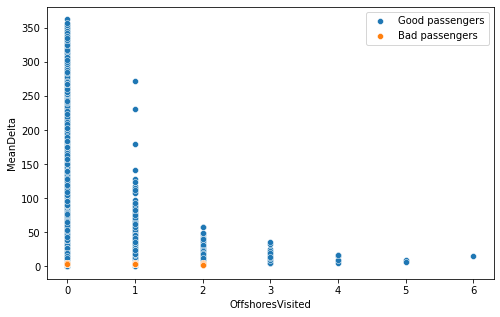

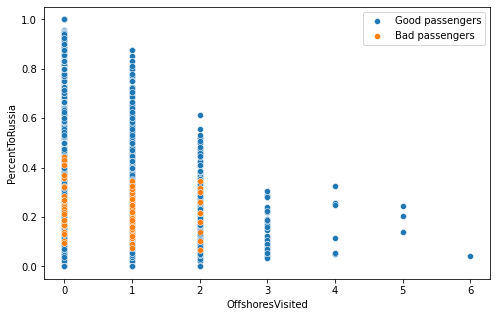

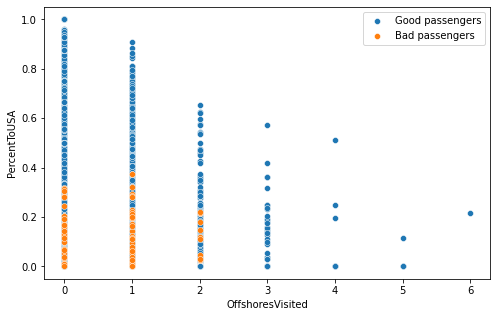

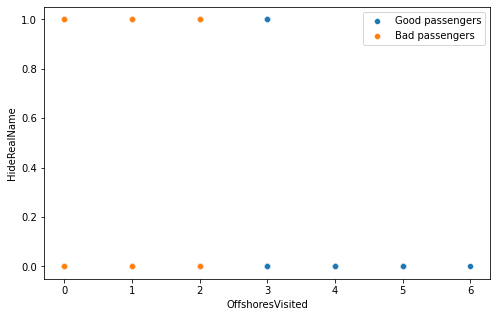

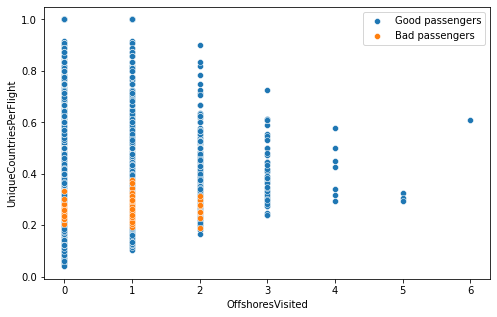

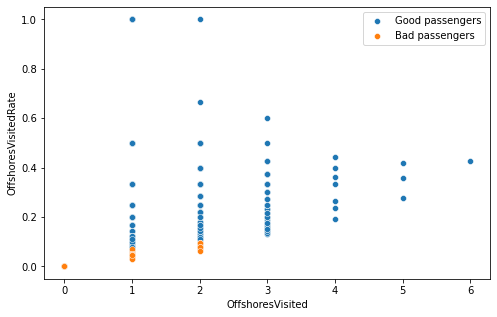

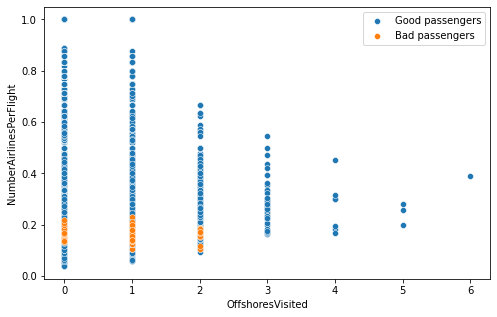

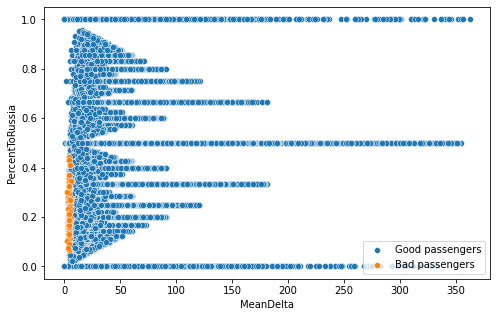

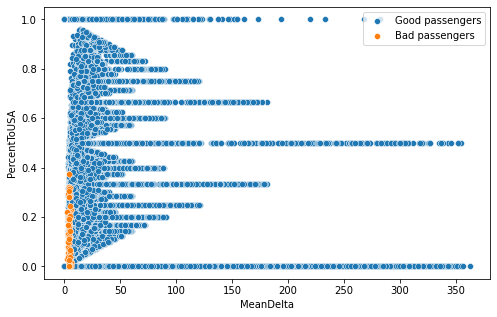

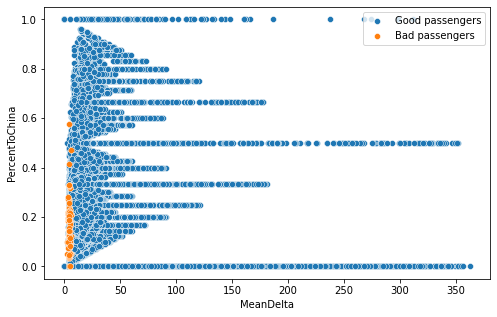

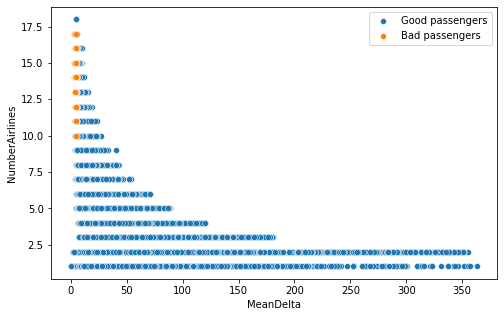

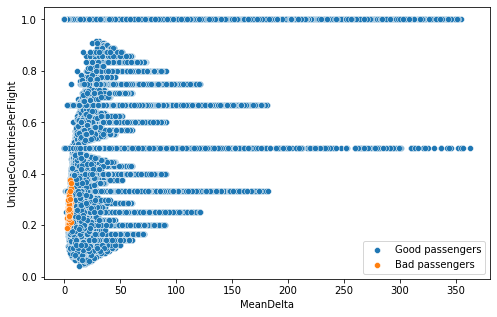

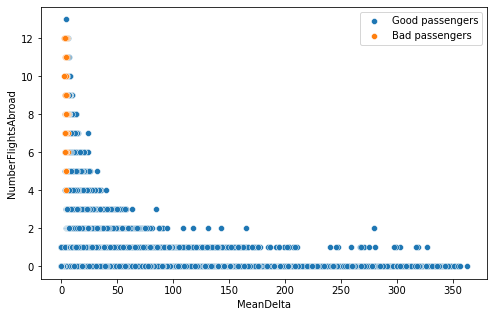

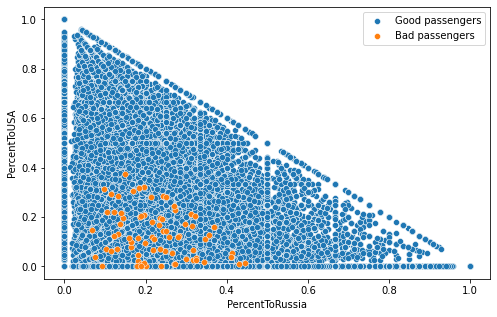

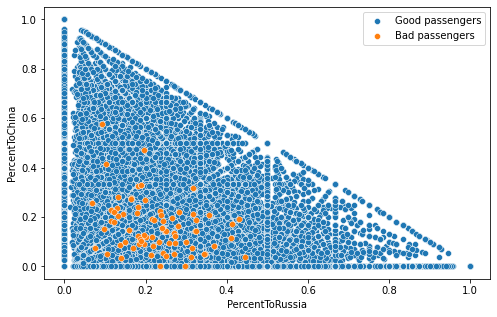

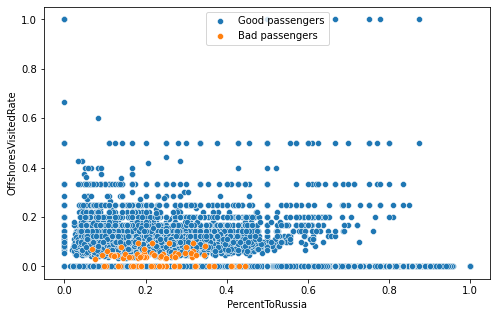

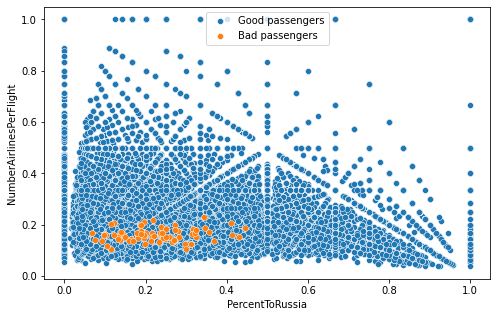

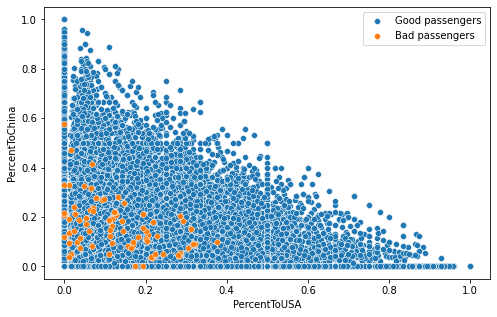

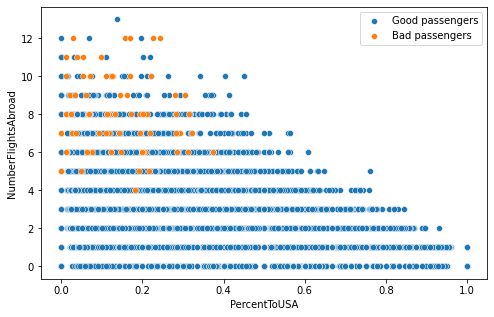

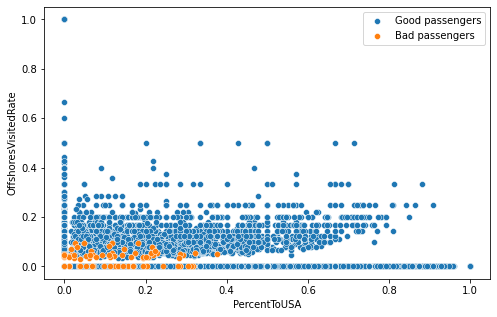

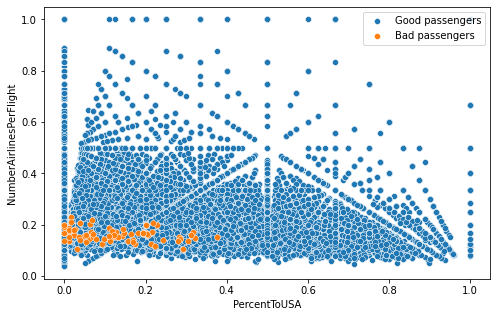

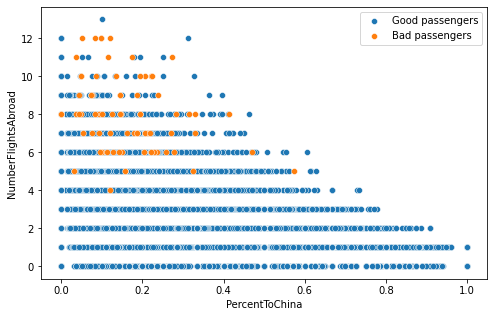

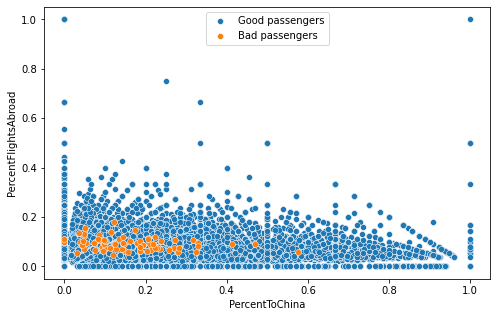

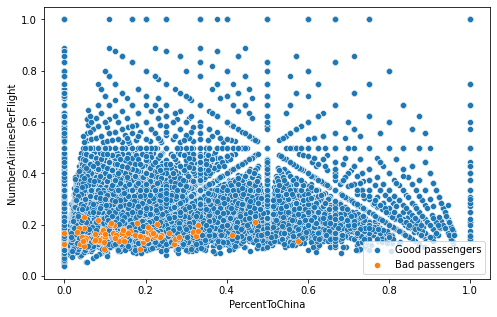

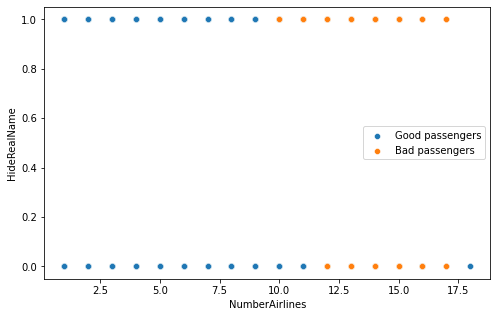

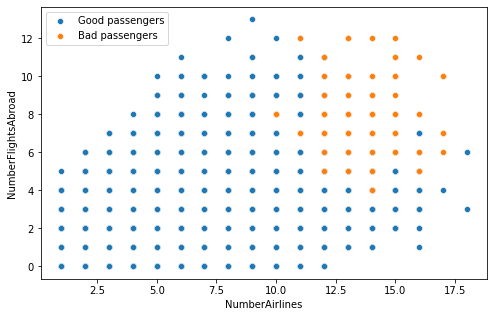

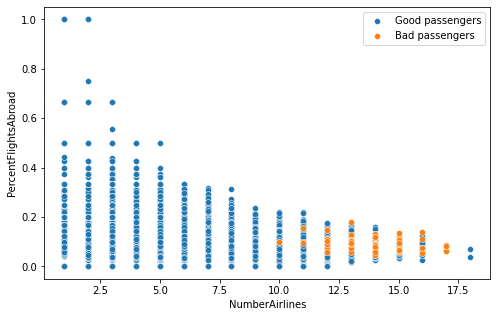

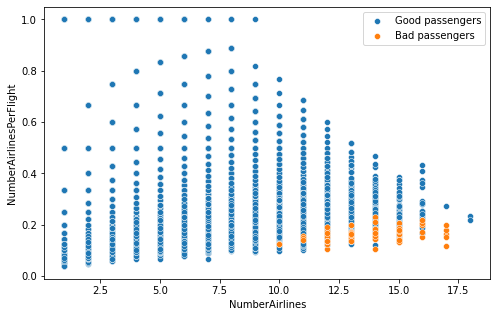

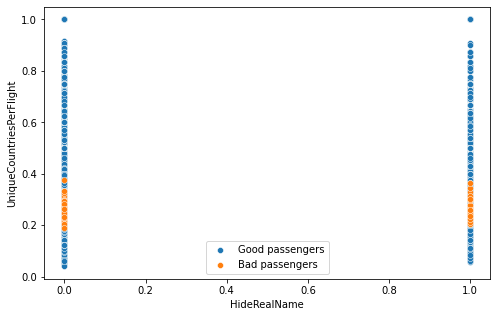

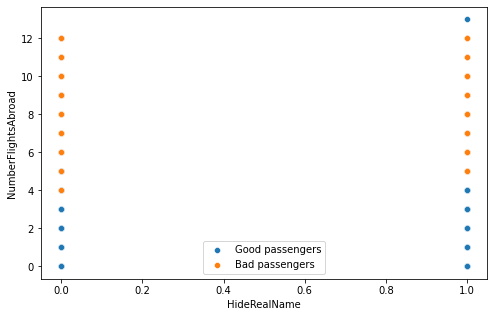

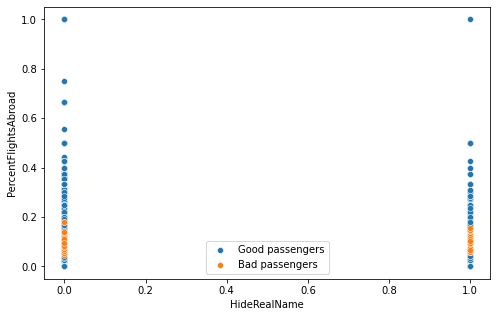

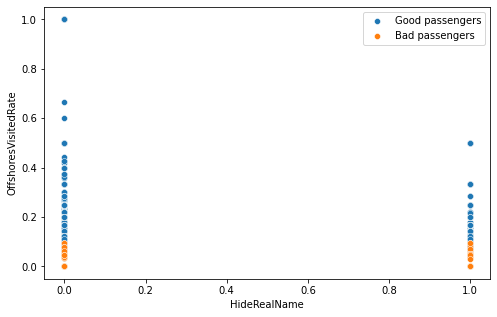

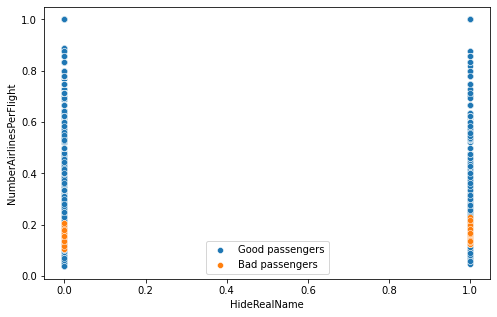

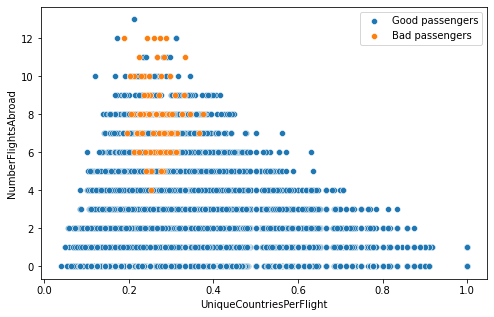

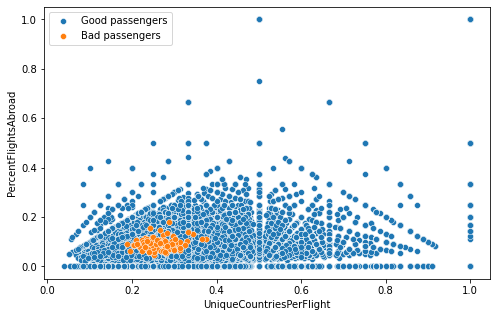

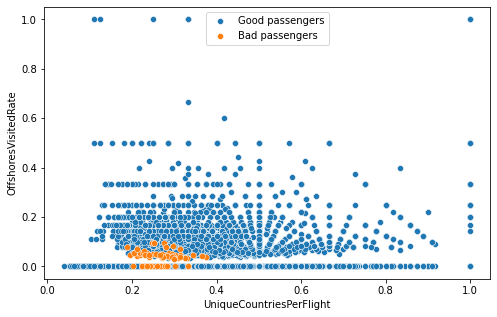

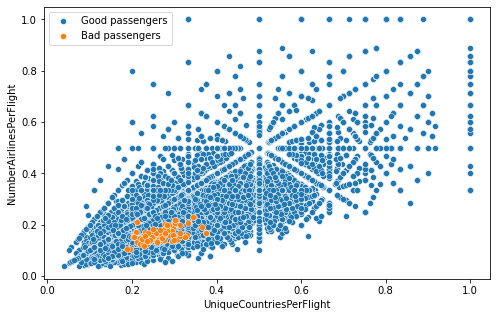

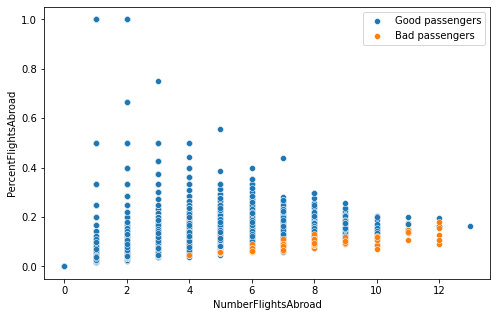

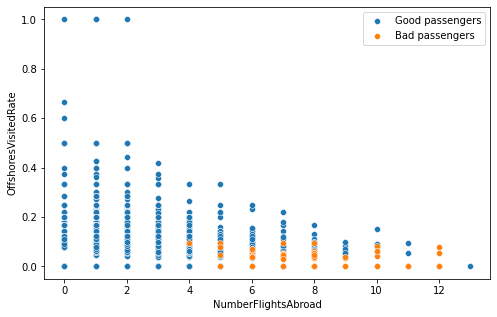

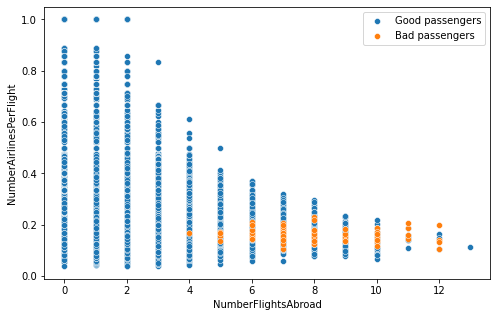

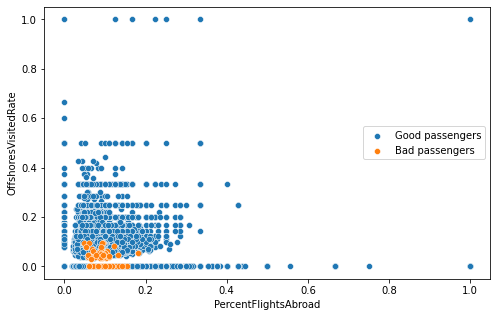

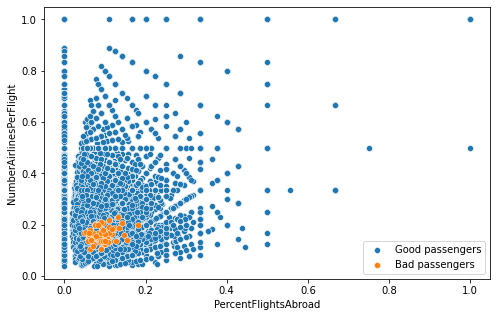

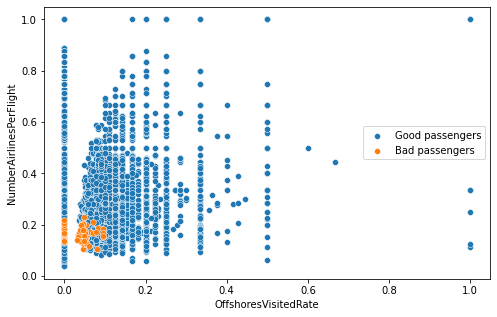

In [77]:
plot_pairplot(cols)

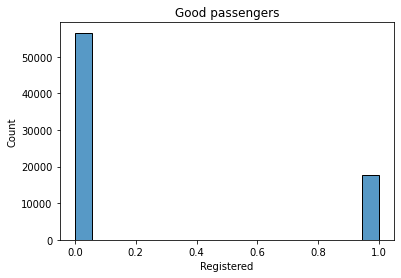

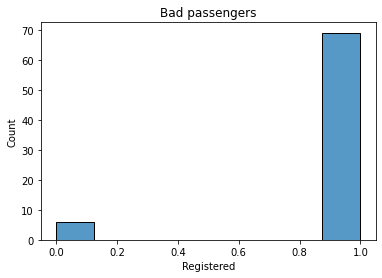

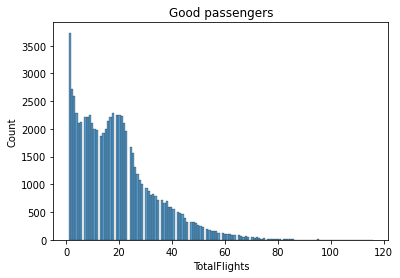

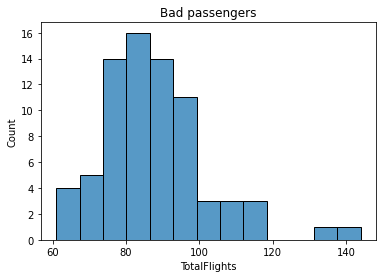

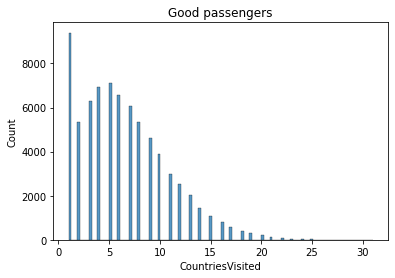

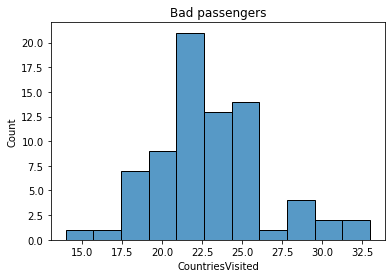

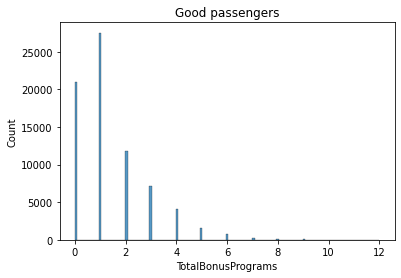

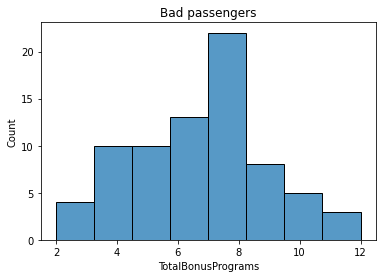

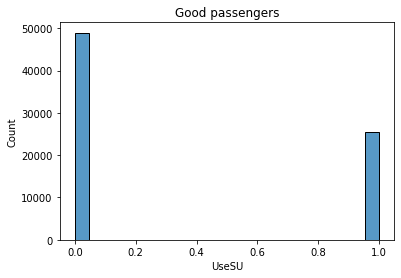

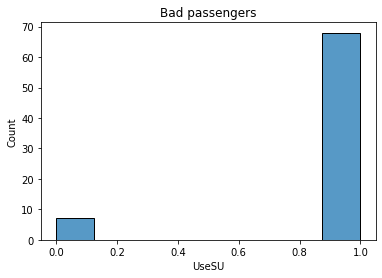

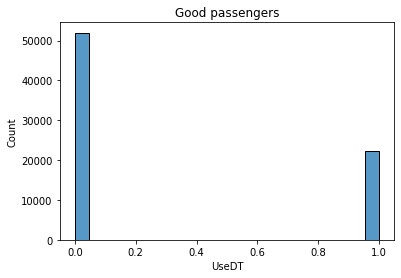

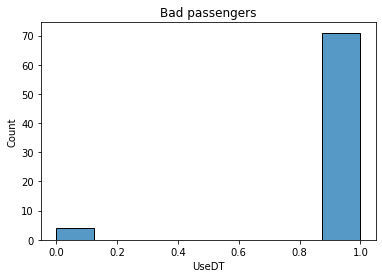

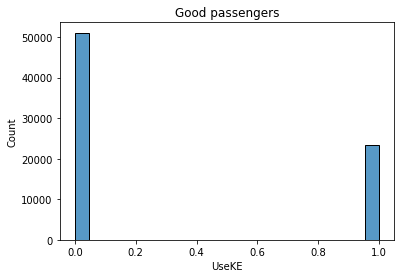

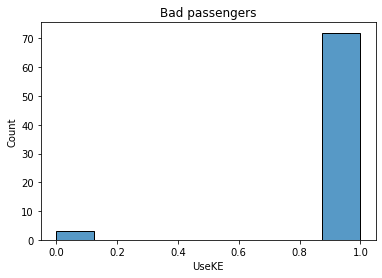

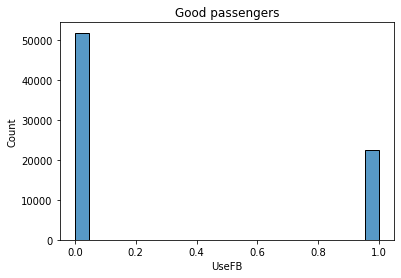

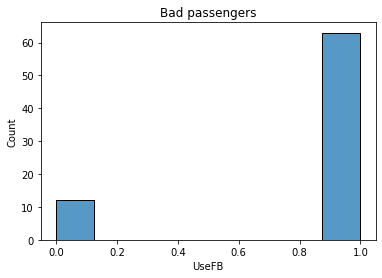

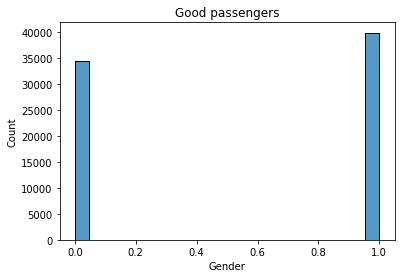

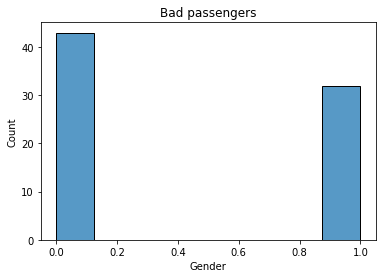

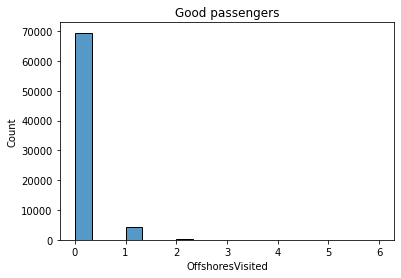

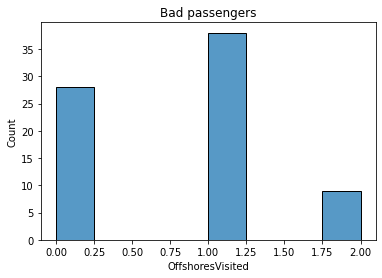

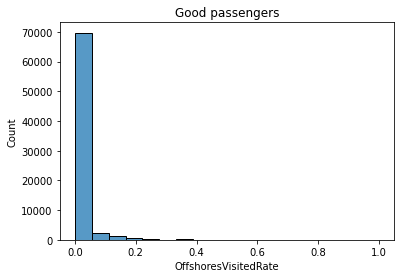

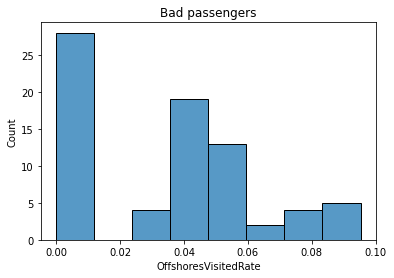

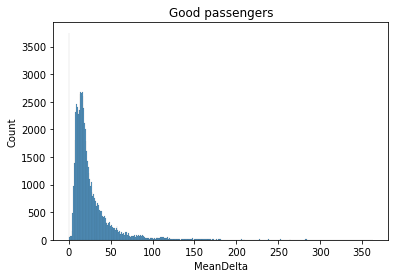

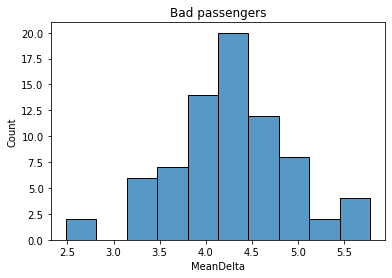

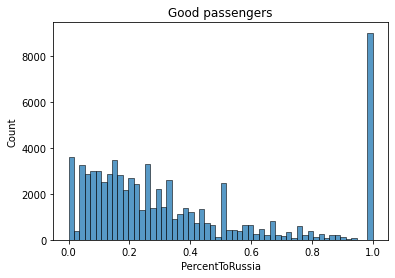

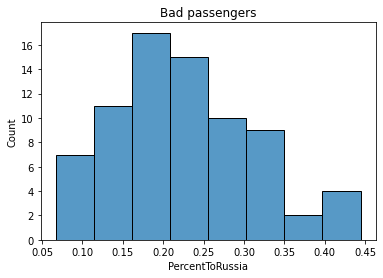

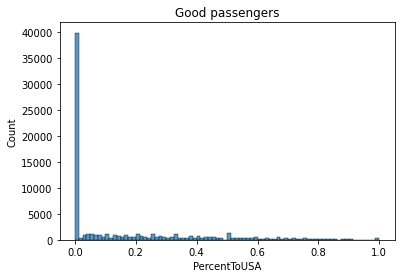

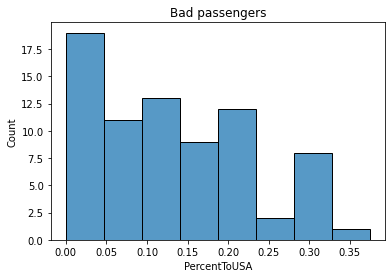

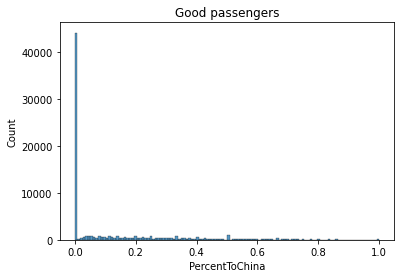

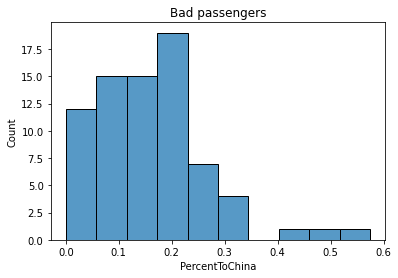

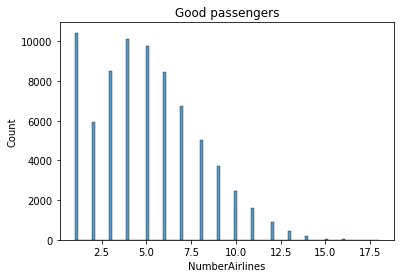

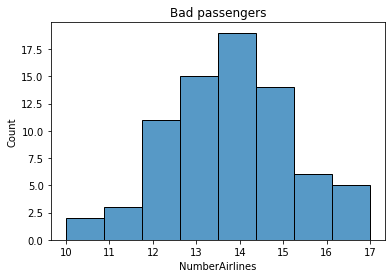

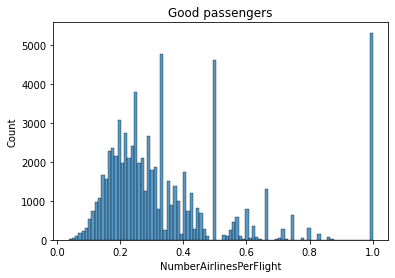

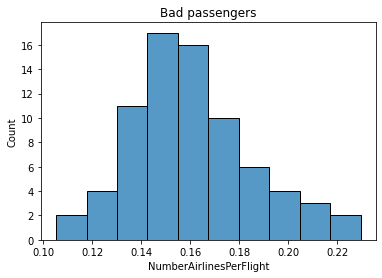

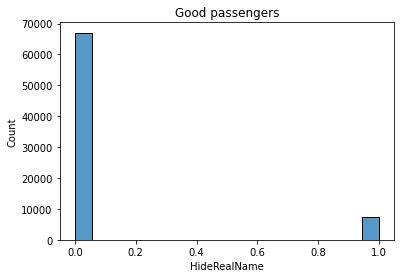

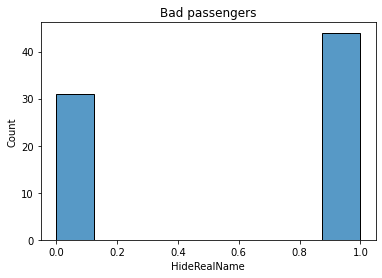

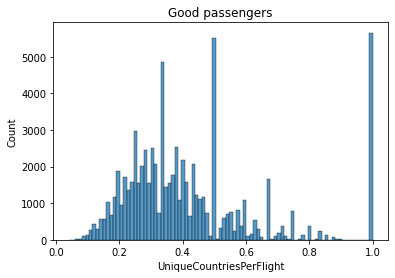

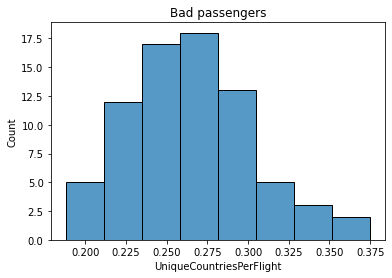

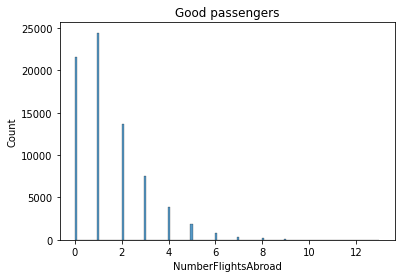

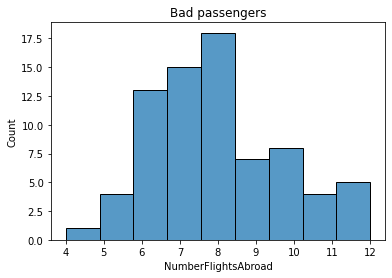

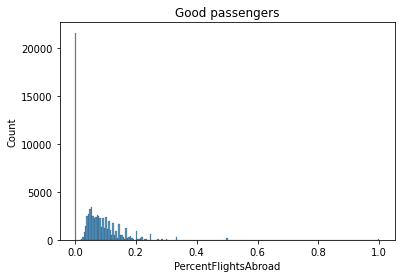

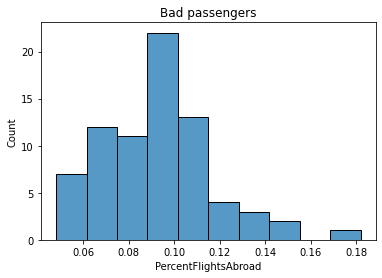

In [85]:
plot_hists()

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(passengers.drop(['Name'], axis=1), y_pred, metric='euclidean')

0.5554481277769743

In [93]:
feats = passengers.drop(['Name', 'OffshoresVisitedRate', 'PercentFlightsAbroad',
                                           'UseDT', 'UseKE', 'UseFB', 'Gender', 'NumberAirlinesPerFlight',
                                           'UniqueCountriesPerFlight',], axis=1).columns

In [95]:
len(feats)

13

In [96]:
d = {i: 0 for i in range(len(feats))}

In [100]:
for i in range(len(model.estimators_)):
    feat = model.estimators_features_[i]
    imp = model.estimators_[i].feature_importances_
    for f, i in zip(feat, imp):
        d[f] += i

In [101]:
d

{0: 1.9791750391694463,
 1: 11.5270950019343,
 2: 9.790233718525872,
 3: 7.918189645677462,
 4: 2.2517148538746574,
 5: 2.266933070314092,
 6: 14.058524968895941,
 7: 9.28289646154108,
 8: 10.415750672679842,
 9: 8.716758599664754,
 10: 10.06902722899656,
 11: 2.460196054787224,
 12: 9.26350468393877}

In [105]:
{name: value for name, value in zip(feats, d.values())}

{'Registered': 1.9791750391694463,
 'TotalFlights': 11.5270950019343,
 'CountriesVisited': 9.790233718525872,
 'TotalBonusPrograms': 7.918189645677462,
 'UseSU': 2.2517148538746574,
 'OffshoresVisited': 2.266933070314092,
 'MeanDelta': 14.058524968895941,
 'PercentToRussia': 9.28289646154108,
 'PercentToUSA': 10.415750672679842,
 'PercentToChina': 8.716758599664754,
 'NumberAirlines': 10.06902722899656,
 'HideRealName': 2.460196054787224,
 'NumberFlightsAbroad': 9.26350468393877}

In [88]:
tree0 = model.estimators_[0]

In [89]:
model.estimators_features_

[array([ 8,  1, 12,  7,  2,  6]),
 array([ 0,  6,  8,  2,  7, 12]),
 array([ 0, 10, 12,  7, 11,  8]),
 array([ 9, 12,  1, 11, 10,  2]),
 array([ 3,  5,  8, 12,  0, 10]),
 array([ 6,  2, 12,  7,  9,  8]),
 array([ 6,  1, 11, 12,  4,  7]),
 array([6, 8, 5, 3, 7, 9]),
 array([ 4,  0, 11,  3,  8,  6]),
 array([10,  7,  2,  3,  9, 11]),
 array([ 9, 10, 11,  5, 12,  0]),
 array([ 4, 10,  5, 12,  3,  8]),
 array([ 7,  8,  1, 12, 10,  0]),
 array([ 3, 11,  6,  0,  9, 12]),
 array([5, 9, 6, 1, 0, 2]),
 array([ 8, 11,  6,  9,  4,  3]),
 array([ 9,  0, 10,  3, 11,  5]),
 array([ 7,  8,  3,  2, 11, 10]),
 array([ 1,  9, 11,  6, 12,  5]),
 array([3, 0, 2, 1, 8, 4]),
 array([2, 0, 1, 6, 7, 3]),
 array([12,  3,  5, 10,  1,  6]),
 array([12,  6,  3,  9,  1, 11]),
 array([10,  2, 11,  5,  9, 12]),
 array([12,  0,  4,  9,  1,  2]),
 array([12,  5,  7,  4,  6,  9]),
 array([ 6,  3,  7,  1,  5, 12]),
 array([12,  5,  2, 11,  4,  9]),
 array([ 6,  8,  7, 12, 10,  5]),
 array([ 3,  2, 11,  9,  1,  0]),
 arr

In [90]:
tree0.feature_importances_

array([0.04460796, 0.2046827 , 0.08390089, 0.29319335, 0.11040829,
       0.2632068 ])